## Сверточная нейронная сеть. Фильтры

In [3]:
# !pip install tensorflow-datasets
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D

import cv2
import numpy as np
from scipy import misc


In [4]:
# определение входных данных(8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data) #Матрица — это объект неизменяемого типа. Для внесения изменений
#можно использовать функцию asarray()
data = data.reshape(1, 8, 8, 1)#Reshape - это процесс изменения формы массива без изменения
#его содержимого.Основная идея состоит в том, чтобы изменить многомерный массив (тензор)
#в другую форму, сохраняя при этом общее количество элементов,чтобы они могли быть более
# эффективно обработаны нейронными сетями.

# создание модели
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(GlobalMaxPooling2D())
# вывод описания созданной модели
model.summary()
# определение дектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# сохранение весов в модель
model.set_weights(weights)
# применение фильтра к входным данным
yhat = model.predict(data)
print(yhat)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 1)           10        
                                                                 
 global_max_pooling2d (Globa  (None, 1)                0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 140ms/step
[[3.]]


In [5]:
I = misc.ascent() # получаем 8-битное изображение в оттенках серого с битовой глубиной 512х512

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6180\3956490660.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  I = misc.ascent() # получаем 8-битное изображение в оттенках серого с битовой глубиной 512х512


In [6]:
I.shape

(512, 512)

In [7]:
I[101:131,120:130]

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

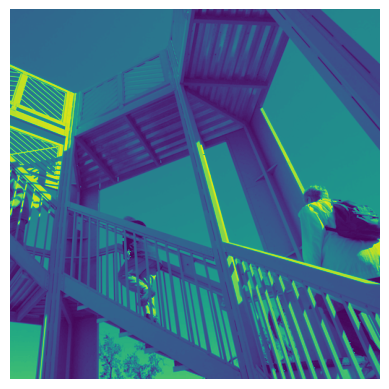

In [8]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.axis('off')
plt.imshow(I)
plt.show()

СОздаем копию массива I с помощью функции np.copy(). Копия сохраняется в переменной I_transformed. Затем размеры копии I_transformed сохраняются в переменные size_x и size_y. size_x содержит количество строк в I_transformed, а size_y содержит количество столбцов.

In [13]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

Определяем матрицу фильтра и вес для свертки изображения. Фильтр можно использовать для применения различных эффектов к изображению, таких как размытие, усиление краев или обнаружение границ. В данном случае, определен фильтр, который помогает обнаружить вертикальные края на изображении.

- Первый фильтр является простым фильтром усреднения, представленным матрицей размером 3x3. Каждый элемент матрицы имеет значение 1. Вес для свертки установлен равным 15.

- Второй фильтр представляет собой фильтр усиления краев. Он помогает выделить контуры объектов на изображении. Он также имеет размер 3x3 и содержит значения [0, 1, 0, 1, -4, 1, 0, 1, 0].

- Третий фильтр похож на второй, но с некоторым изменением в значениях элементов матрицы. Он состоит из следующих значений: [-1, -2, -1, 1, -4, 1, 0, 1, 0].

- Последний фильтр является фильтром Собеля и применяется для обнаружения вертикальных или горизонтальных краев на изображении. Он состоит из следующих значений: [-1, 0, 1, -2, 0, 2, -1, 0, 1].

Вес для свертки установлен равным 1 и указывает, что каждый элемент фильтра будет умножаться на соответствующий пиксель изображения.

In [14]:
# Фильтр усреднения
# filter = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/15

# Фильтр края. Контуры изображения
# filter = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])

# filter = np.array([ [-1, -2, -1], [1, -4, 1], [0, 1, 0]])

# Фильтр Собеля. Для обнаржения вертикальных и горизонтальных значений
filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#зададим вес для свертки
weight = 1

In [15]:
np.array(filter).shape

(3, 3)

In [16]:
np.array(filter).T

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

#### Свертка

In [17]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (I[x - 1, y-1] * filter[0][0])
    convolution = convolution + (I[x, y-1] * filter[0][1])
    convolution = convolution + (I[x + 1, y-1] * filter[0][2])
    convolution = convolution + (I[x-1, y] * filter[1][0])
    convolution = convolution + (I[x, y] * filter[1][1])
    convolution = convolution + (I[x+1, y] * filter[1][2])
    convolution = convolution + (I[x-1, y+1] * filter[2][0])
    convolution = convolution + (I[x, y+1] * filter[2][1])
    convolution = convolution + (I[x+1, y+1] * filter[2][2])
    if(convolution<0):
      convolution=-convolution
    if(convolution>255):
      convolution=255
    I_transformed[x, y] = convolution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6180\2493784486.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


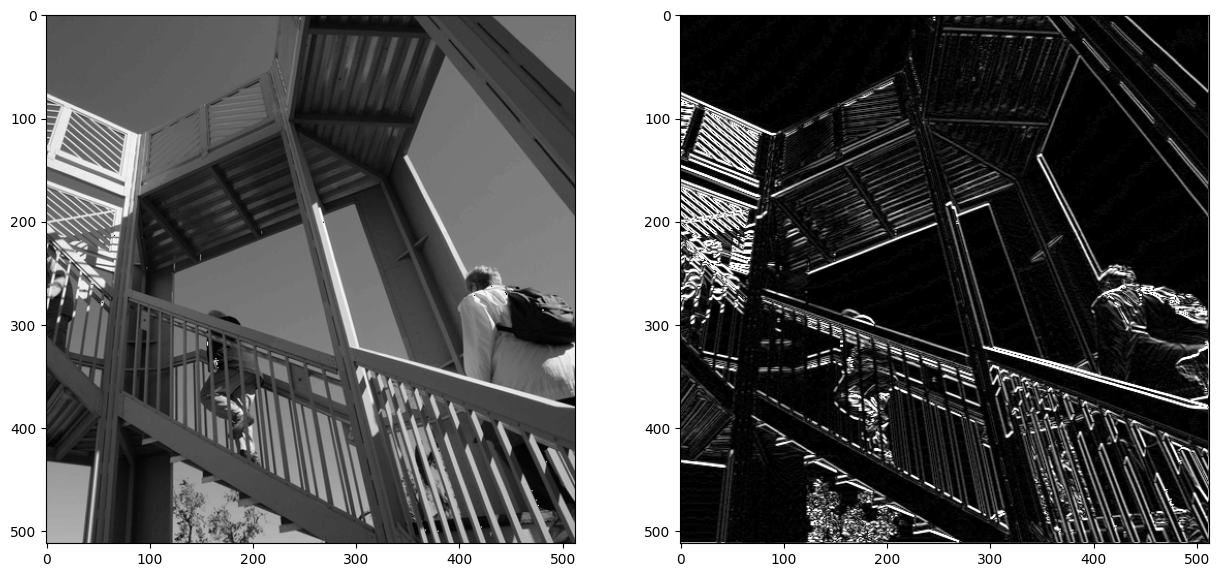

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6180\2493784486.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


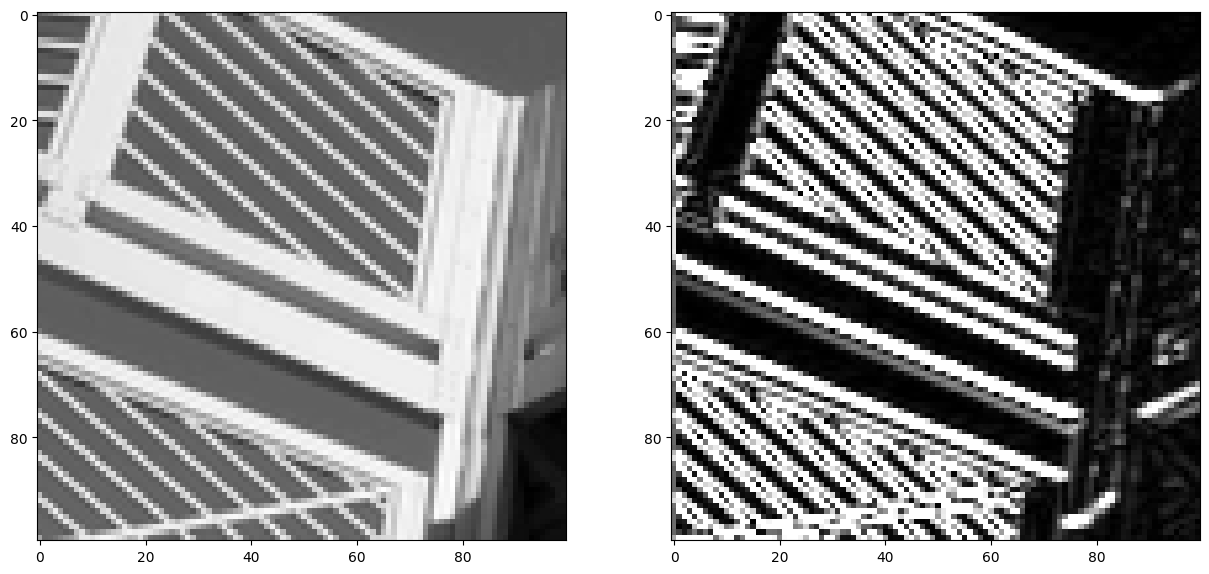

In [18]:
plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(I_transformed)
plt.show()

ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
plt.show()